#    Leitura e Exibição de Imagens

In [5]:
# Importando libs utilizadas 
import cv2
import matplotlib.pyplot as plt
import numpy as np


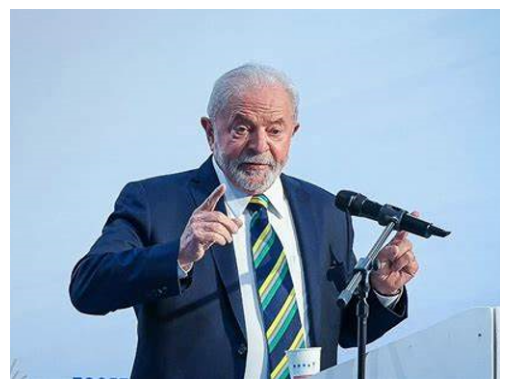

In [194]:

# Carregar imagem
image = cv2.imread('./assets/lula.png')

# Exibir imagem

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Remover eixos
plt.show()


# Pré-Processamento


### Conversão para grayscale:

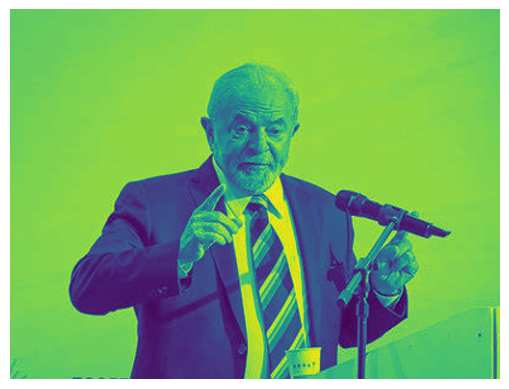

In [75]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_image)
plt.axis('off')  # Remover eixos
plt.show()



### Redimensionar:


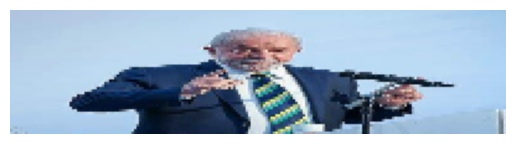

In [181]:
image = cv2.imread('./assets/lula.png')
resized_image = cv2.resize(image, (200, 50))

plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Remover eixos
plt.show()

### Equalização de histograma:


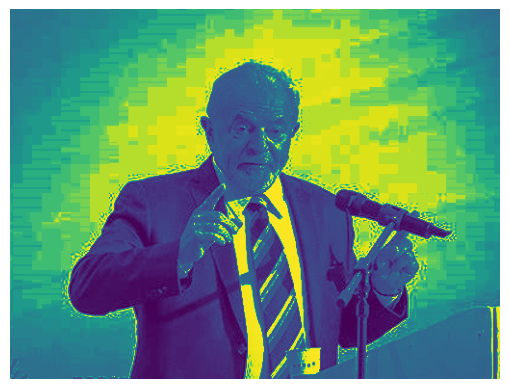

In [78]:
equalized_image = cv2.equalizeHist(gray_image)

plt.imshow(equalized_image)
plt.axis('off')  # Remover eixos
plt.show()


# Aplicação de Filtros

### Desfoque:


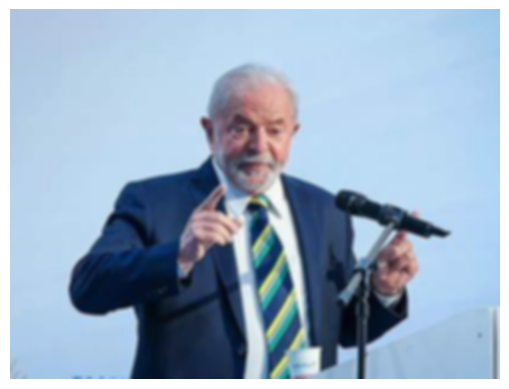

In [177]:
image = cv2.imread('./assets/lula.png')
blurred_image = cv2.GaussianBlur(image, (7, 7), 2)


plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Remover eixos
plt.show()


### Detecção de bordas:

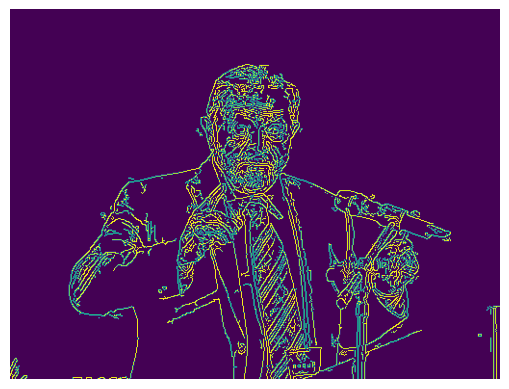

In [83]:
edges = cv2.Canny(image, 50, 150)


plt.imshow(edges)
plt.axis('off')  # Remover eixos
plt.show()

### Detecção de Características:


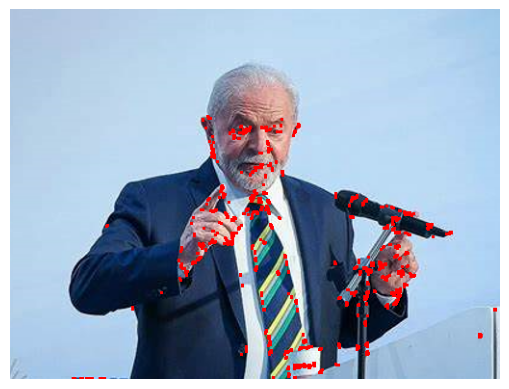

In [196]:
# Cantos com Harris

image = cv2.imread('./assets/lula.png')

# Converter a imagem de BGR para escala de cinza
operatedImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # A detecção de cantos geralmente é feita em imagens em escala de cinza

# Aplicar o detector de cantos de Harris na imagem em escala de cinza
# O primeiro parâmetro é a imagem de entrada, o segundo é o tamanho da vizinhança (2x2 pixels), 
# o terceiro é o parâmetro de Sobel (5), e o quarto é o fator de sensibilidade (0.07)
dest = cv2.cornerHarris(operatedImage, 2, 5, 0.07)

# Dilatar a imagem resultante para aumentar a visibilidade dos cantos detectados
# A dilatação faz com que os pontos detectados se tornem mais proeminentes
dest = cv2.dilate(dest, None)

# Marcar os cantos na imagem original com a cor vermelha (0, 0, 255)
# Aqui, todos os pontos na imagem que têm um valor maior que 1% do valor máximo detectado são coloridos
image[dest > 0.01 * dest.max()] = [0, 0, 255]
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Remover eixos
plt.show()

### Transformações Geométricas:


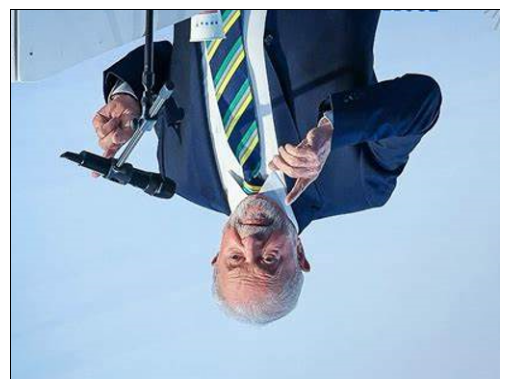

In [173]:
# Rotação
image = cv2.imread('./assets/lula.png')
rows, cols = image.shape[:2]
M = cv2.getRotationMatrix2D((cols/2, rows/2), 180, 1)
rotated_image = cv2.warpAffine(image, M, (cols, rows))


plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Remover eixos
plt.show()


### Operações Morfológicas:
*Erosão e Dilatação*

1. *Erosão*


(np.float64(-0.5), np.float64(508.5), np.float64(383.5), np.float64(-0.5))

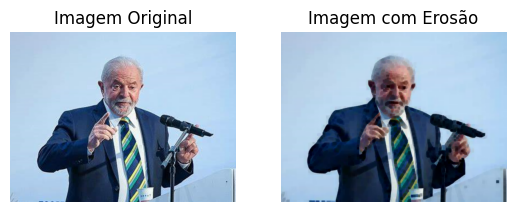

In [6]:
import numpy as np

image = cv2.imread('./assets/lula.png')


kernel = np.ones((5,5),np.uint8)
eroded_image = cv2.erode(image, kernel, iterations = 1)


plt.subplot(1, 2, 1)
plt.title('Imagem Original')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Imagem com Erosão')
plt.imshow(cv2.cvtColor(eroded_image, cv2.COLOR_BGR2RGB))
plt.axis('off')


1. *Dilatação*


(np.float64(-0.5), np.float64(508.5), np.float64(383.5), np.float64(-0.5))

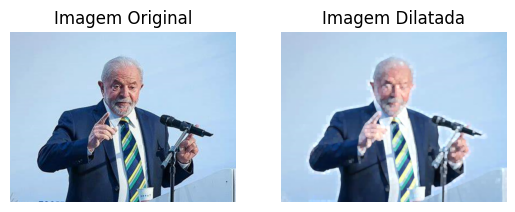

In [215]:

image = cv2.imread('./assets/lula.png')

# Aplicar a dilatação
dilated_image = cv2.dilate(image, kernel, iterations=1)

plt.subplot(1, 2, 1)
plt.title('Imagem Original')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Imagem Dilatada')
plt.imshow(cv2.cvtColor(dilated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')


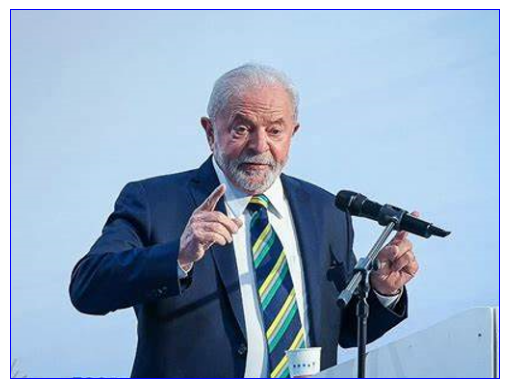

In [11]:
import cv2
import numpy as np

# Carregar a imagem
image = cv2.imread('assets/lula.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicar limiarização binária
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Remover ruído
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Definir o fundo da imagem
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Definir os objetos (foreground)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Marcar regiões desconhecidas
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marcar os objetos conectados
_, markers = cv2.connectedComponents(sure_fg)

# Adicionar 1 a todas as marcas para distinguir o fundo
markers = markers + 1

# Marcar regiões desconhecidas como zero
markers[unknown == 0] = 0

# Aplicar o algoritmo Watershed
markers = cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]  # Marcar bordas em vermelho

# Exibir resultado
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

